PROYECTO SERIES TIEMPO ALTERNATIVO

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
import joblib


In [3]:
url = "/workspaces/proyecto_series_tiempo_alternativo/data/raw/internal-link (9).csv"

data = pd.read_csv(url)
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


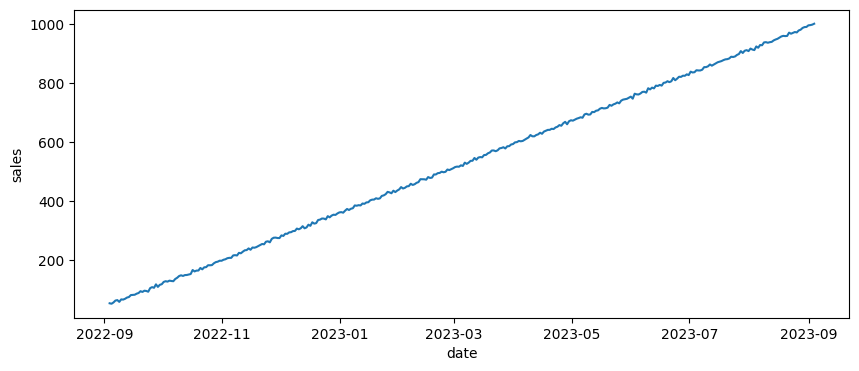

In [ ]:
data["date"] = pd.to_datetime(data["date"])

data = data.set_index("date")

ts = data["sales"]
plt.figure(figsize=(10,4))
sns.lineplot(data=ts)
plt.show()

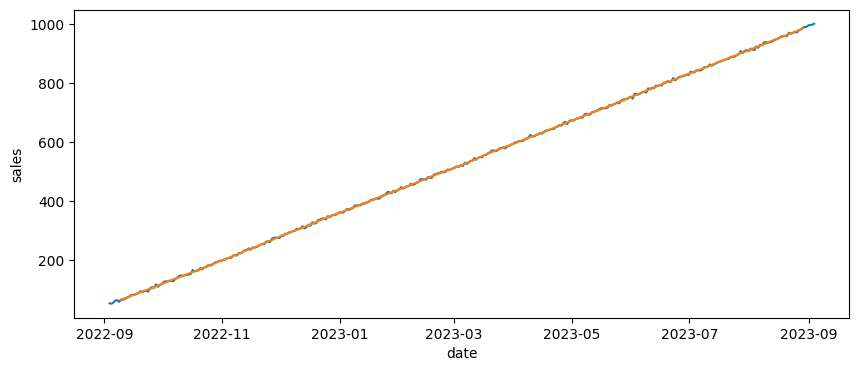

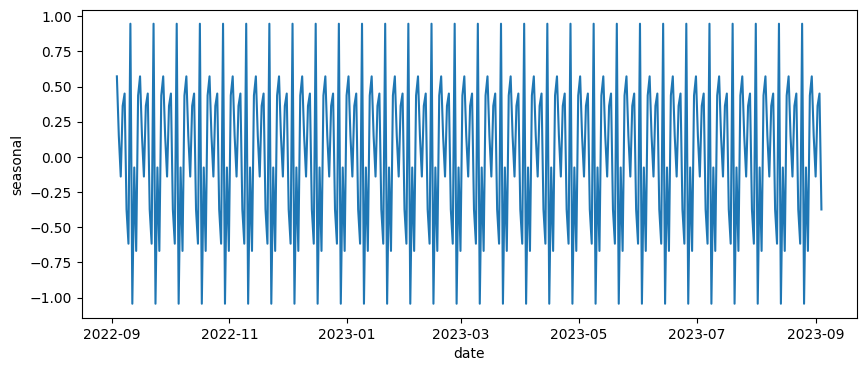

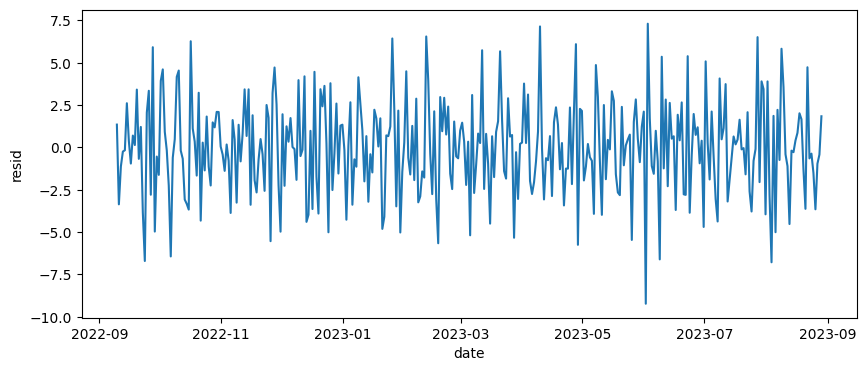

In [ ]:
decomposition = seasonal_decompose(ts, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,4))
sns.lineplot(data=ts)
sns.lineplot(data=trend)
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(data=seasonal)
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(data=residual)
plt.show()


In [ ]:
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna(), autolag="AIC")
    labels = ["Test Statistic", "p-value", "# Lags Used", "Number of Observations Used"]
    output = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        output[f"Critical Value {key}"] = value
    return output

test_stationarity(ts)


Test Statistic                   0.545414
p-value                          0.986190
# Lags Used                     13.000000
Number of Observations Used    352.000000
Critical Value 1%               -3.449065
Critical Value 5%               -2.869786
Critical Value 10%              -2.571163
dtype: float64

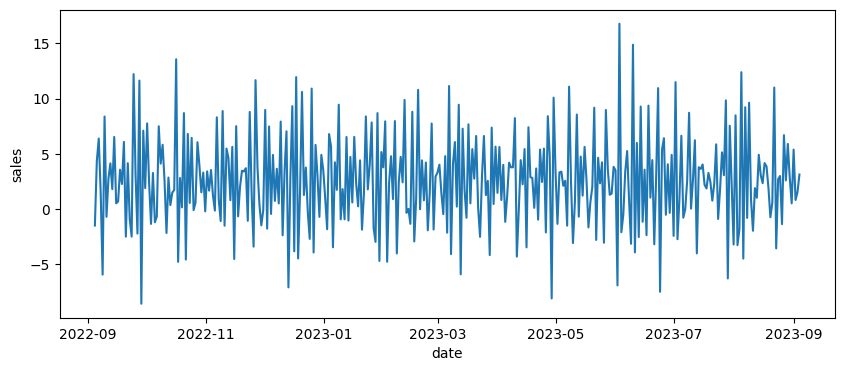

In [ ]:
ts_stationary = ts.diff().dropna()
test_stationarity(ts_stationary)

plt.figure(figsize=(10,4))
sns.lineplot(data=ts_stationary)
plt.show()


In [ ]:
model = auto_arima(ts, seasonal=True, m=12, trace=False)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Sun, 30 Nov 2025   AIC                           1839.552
Time:                        12:09:30   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/tmp/ipykernel_9978/1362347911.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=ts.index[-1], periods=n_periods+1, freq="M")[1:]


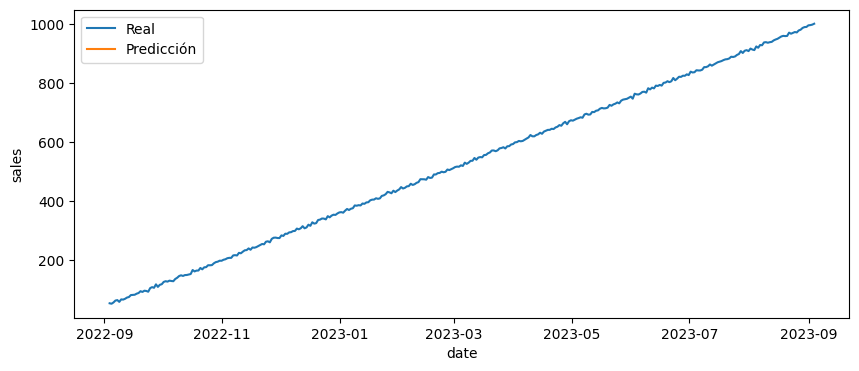

In [ ]:
n_periods = 12
forecast = model.predict(n_periods=n_periods)
future_index = pd.date_range(start=ts.index[-1], periods=n_periods+1, freq="M")[1:]
forecast_series = pd.Series(forecast, index=future_index)

plt.figure(figsize=(10,4))
sns.lineplot(data=ts, label="Real")
sns.lineplot(data=forecast_series, label="Predicción")
plt.show()


In [10]:
# ================================
# PASO 5: GUARDAR EL MODELO
# ================================
joblib.dump(model, "modelo_arima.pkl")


['modelo_arima.pkl']